In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import yfinance as yf


In [2]:
symbols = ["DIA", "MSFT", "AAPL", "VAW", "VB", "XRT", "IVV", "GOOG", "JNJ", "SHOP", "AMC"]

def get_history(*symbols):
    dfs = []
    for symbol in symbols:
        hist = yf.Ticker(symbol).history(period="5y")
        rename = {col: f"{symbol}_{col}" for col in hist.columns}
        hist = hist.rename(columns=rename)
        hist = hist.sort_index()
        hist
        close = hist[f"{symbol}_Close"].values
        delta = close[1:] - close[:-1]
        hist[f"{symbol}_Delta"] = [None] + list(delta)
        hist[f"{symbol}_Return"] = [None] + list(delta / close[:-1])
        hist = hist.dropna()
        hist = hist[[f"{symbol}_Close", f"{symbol}_Delta", f"{symbol}_Return"]]
        hist
        dfs.append(hist)
        
    df = dfs[0]
    
    for other in dfs[1:]:
        df = df.merge(other, on="Date")
        
    df = df.dropna()
    return df

df = get_history(*symbols)
df

,DIA_Close,DIA_Delta,DIA_Return,MSFT_Close,MSFT_Delta,MSFT_Return,AAPL_Close,AAPL_Delta,AAPL_Return,VAW_Close,...,GOOG_Return,JNJ_Close,JNJ_Delta,JNJ_Return,SHOP_Close,SHOP_Delta,SHOP_Return,AMC_Close,AMC_Delta,AMC_Return
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-12,158.645645,1.478119,0.009405,50.112518,0.311783,0.006261,25.680305,0.330191,0.013025,90.722076,...,0.009496,95.864510,0.551033,0.005781,29.770000,0.250000,0.008469,20.938009,0.336349,0.016326
2016-04-13,160.285019,1.639374,0.010334,50.754379,0.641861,0.012808,26.052345,0.372040,0.014487,91.906204,...,0.011614,96.100693,0.236183,0.002464,29.799999,0.029999,0.001008,21.526632,0.588623,0.028113
2016-04-14,160.455215,0.170197,0.001062,50.763554,0.009174,0.000181,26.066298,0.013952,0.000536,91.796898,...,0.001969,96.074432,-0.026260,-0.000273,30.959999,1.160000,0.038926,21.297297,-0.229336,-0.010654
2016-04-15,160.186340,-0.268875,-0.001676,51.029476,0.265923,0.005238,25.543112,-0.523186,-0.020071,92.279640,...,0.007700,96.371826,0.297394,0.003095,30.969999,0.010000,0.000323,21.075613,-0.221684,-0.010409
2016-04-18,161.172455,0.986115,0.006156,51.772221,0.742744,0.014555,24.992023,-0.551088,-0.021575,92.735069,...,0.010026,97.027832,0.656006,0.006807,31.530001,0.560001,0.018082,21.572500,0.496887,0.023576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,335.200012,3.750000,0.011314,249.070007,6.720001,0.027728,125.900002,2.900002,0.023577,176.589996,...,0.041071,163.429993,0.599991,0.003685,1145.949951,-9.460083,-0.008188,10.610000,1.250000,0.133547
2021-04-06,334.369995,-0.830017,-0.002476,247.860001,-1.210007,-0.004858,126.209999,0.309998,0.002462,176.789993,...,-0.000359,163.389999,-0.039993,-0.000245,1156.140015,10.190063,0.008892,10.200000,-0.410000,-0.038643
2021-04-07,334.369995,0.000000,0.000000,249.899994,2.039993,0.008230,127.900002,1.690002,0.013390,173.740005,...,0.011206,163.610001,0.220001,0.001346,1159.469971,3.329956,0.002880,9.850000,-0.349999,-0.034314


0.0023494029899570174


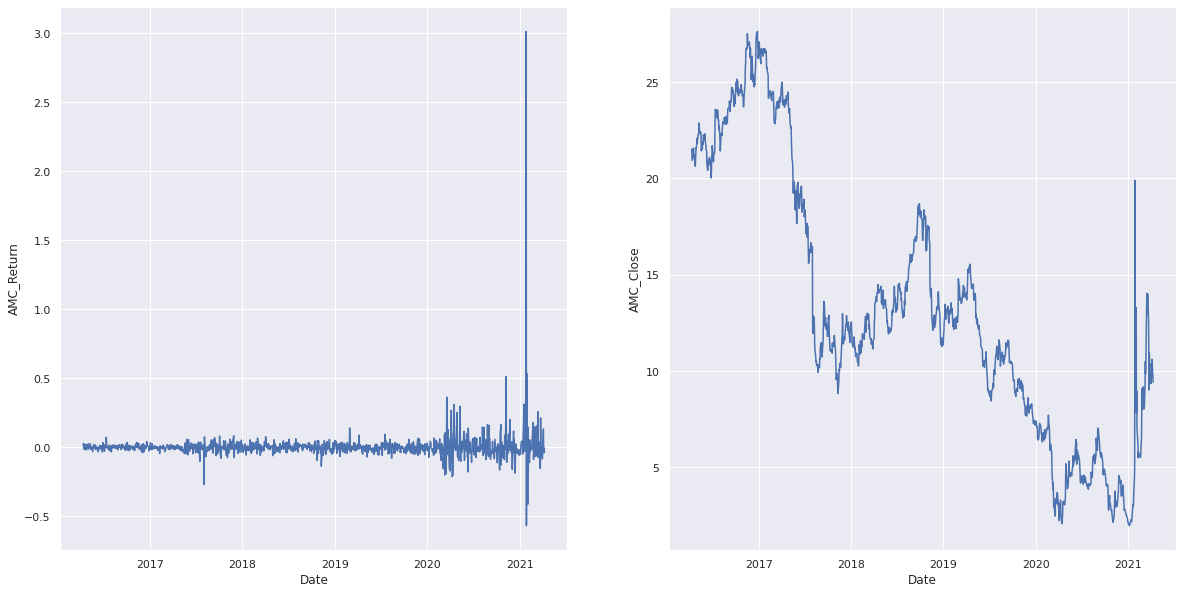

In [10]:
print(df.AMC_Return.mean())
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.lineplot(x=df.index, y=df.AMC_Return)
plt.subplot(1, 2, 2)
sns.lineplot(x=df.index, y=df.AMC_Close)
plt.show()

In [138]:
def sample(symbols, df, nsample):
    n = len(symbols)
    cols = [f"{symbol}_Return" for symbol in symbols]
    data = df[cols]
    
    cov = np.cov(data.T)
    means = np.mean(data, axis=0)
    
    print("cov", cov.shape)
    print("means", means.shape)
    
    # one hots
    w0 = np.zeros(shape=(n, n), dtype=np.float32)
    for i in range(n):
        w0[i, i] = 1.0

    w = np.random.rand(n*nsample).reshape(n, nsample)
    w = np.concatenate([w, w0], axis=1)
    w = w / w.sum(axis=0, keepdims=True)

    print("w", w.shape)
    
    returns = []
    risks = []
    
    for i in range(nsample):
        mean = w[:, i].dot(means)
        var = w[:, i].dot(cov).dot(w[:, i])
        risk = np.sqrt(var)
        
        # for plotting sanity
        #if risk < 5.0:
        if True:
            returns.append(mean)
            risks.append(risk)

    return returns, risks

In [139]:
# https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/

['DIA', 'MSFT', 'AAPL', 'VAW', 'VB', 'XRT', 'IVV', 'GOOG', 'JNJ']


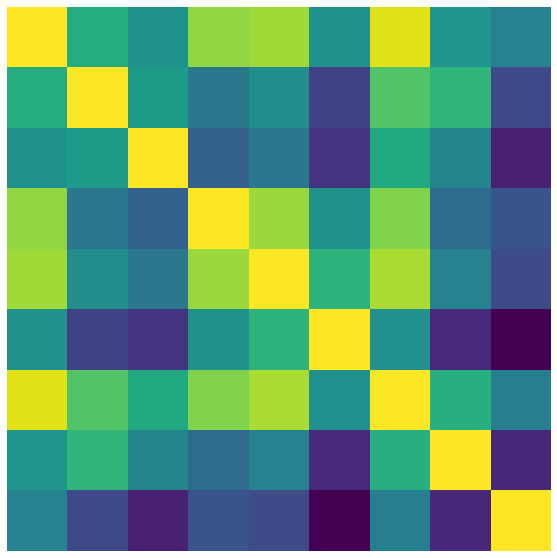

In [140]:
data = np.asmatrix(df[[f"{symbol}_Return" for symbol in symbols]].T)
data = data / np.std(data, axis=1)
rho = np.cov(data)
print(symbols)
plt.figure(figsize=(10,10))
plt.imshow(rho, cmap="viridis")
plt.axis("off")
plt.show()

In [141]:
import cvxopt as opt
from cvxopt import blas, solvers

def optimal_portfolio(returns):
    """
    Taken from:
    https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
    
    QP docs here:
    https://cvxopt.org/userguide/coneprog.html#quadratic-programming
    
    Page 16 here:
    https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi1ko729-7vAhXigP0HHVSBDAkQFjAAegQIBRAD&url=https%3A%2F%2Fpublikationen.bibliothek.kit.edu%2F1000007246%2F11235&usg=AOvVaw2YCB12QbGK3IhadaGuVk_f
    """
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 1000
    eps = 1e-1
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    #print(mus)
    #mean_returns = np.mean(returns, axis=1)
    #mus = list(np.linspace(np.min(mean_returns)+eps, np.max(mean_returns)-eps, num=N))
    print(mus)
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # qp(P, q, G, h, A, b):
    #     minimize (1/2) x.T * P * x + q.T * x
    #     subject to:
    #         Gx <= h
    #         Ax = b
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks, portfolios

In [142]:
%%capture
return_vec = np.asmatrix(df[[f"{symbol}_Return" for symbol in symbols]].T)
weights, returns, risks, portfolios = optimal_portfolio(return_vec)

,portfolio,return,risk
0,"[3.403007261117187e-07, 0.00012831224932753597...",0.001482,0.019107
1,"[3.407178872414594e-07, 0.00013161820063545314...",0.001482,0.019107
2,"[3.4113100177579225e-07, 0.0001350129617782303...",0.001482,0.019107
3,"[3.415834440706132e-07, 0.00013851763887913628...",0.001482,0.019107
4,"[3.420376190404672e-07, 0.0001421223796044842,...",0.001482,0.019107
...,...,...,...
995,"[2.7820442907525075e-08, 1.6870439222203062e-0...",0.000616,0.011045
996,"[2.6835953649201207e-08, 1.6348580243507978e-0...",0.000616,0.011045
997,"[2.5877663420455016e-08, 1.583914609765504e-08...",0.000616,0.011045
998,"[2.4945453398176154e-08, 1.5342062815189332e-0...",0.000616,0.011045


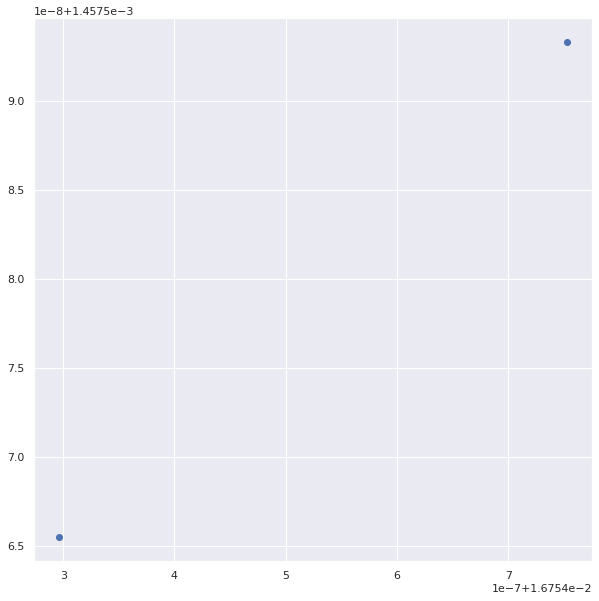

,portfolio,return,risk
311,"[4.687201655413183e-07, 0.6036266567115754, 0....",0.001458,0.016755
312,"[5.07001634795931e-07, 0.6042955941000269, 0.3...",0.001458,0.016754


In [159]:
import IPython

pdf = pd.DataFrame(data={"portfolio": portfolios, "return": returns, "risk": risks})
IPython.display.display(pdf)

#optimal = pd.DataFrame(data={"symbol": symbols, "weight": list(weights.reshape(-1))})
#IPython.display.display(optimal)

q = pdf.query("risk < 0.016755 and risk > 0.016754")

plt.figure(figsize=(10,10))
plt.scatter(q.risk, q["return"])
plt.show()

q

In [165]:
np.asmatrix(q.iloc[0, :].portfolio)

matrix([[4.68720166e-07],
        [6.03626657e-01],
        [3.96366291e-01],
        [6.27369699e-07],
        [6.70405964e-07],
        [3.23809631e-06],
        [3.76687383e-07],
        [9.36596730e-07],
        [7.34200359e-07]])

cov (9, 9)
means (9,)
w (9, 1009)


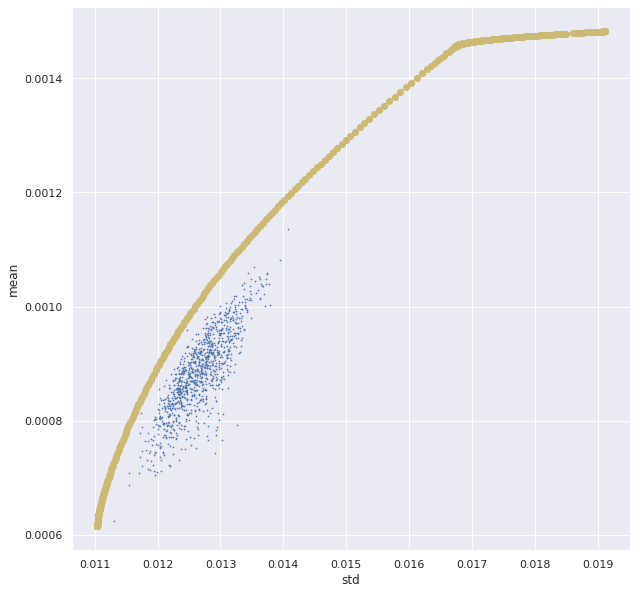

In [144]:
means = np.mean(return_vec, axis=1)
stds = np.std(return_vec, axis=1)


fig = plt.figure(figsize=(10,10))
#plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

sample_returns, sample_risks = sample(symbols, df, 1000)

#plt.figure(figsize=(10,10))
plt.scatter(sample_risks, sample_returns, s=0.5)
plt.show()

In [145]:
# https://sites.math.washington.edu/~burke/crs/408/fin-proj/mark1.pdf

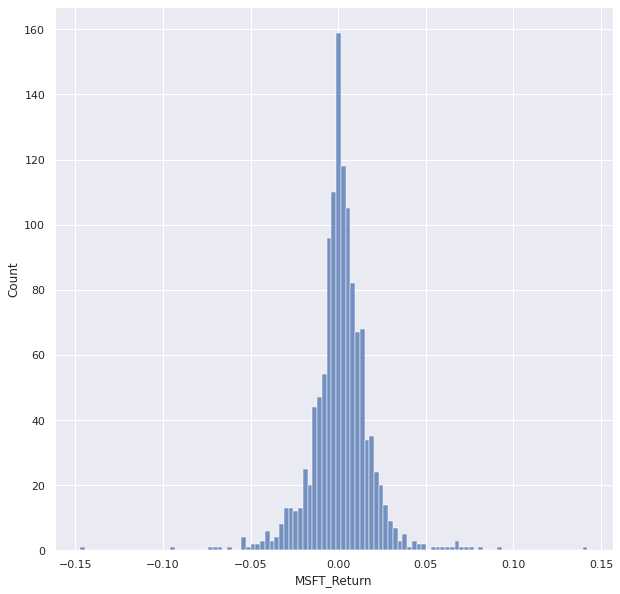

In [146]:
plt.figure(figsize=(10,10))
sns.histplot(df.MSFT_Return)
plt.show()

In [73]:
np.power(1.50, 1/4)

1.1066819197003215

In [76]:
120 *(1.10669)**(4)

180.00525704756015

In [79]:
tick = yf.Ticker("SHOP")
tick.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-08,1126.040039,1164.000000,1070.819946,1072.430054,2457000,0,0
2021-03-09,1123.680054,1147.890015,1101.510010,1130.739990,1857000,0,0
2021-03-10,1169.640015,1169.969971,1079.510010,1087.900024,2050300,0,0
2021-03-11,1119.500000,1158.150024,1086.916016,1142.239990,1657800,0,0
2021-03-12,1121.979980,1146.265015,1093.031006,1140.630005,1085800,0,0
2021-03-15,1137.239990,1159.140015,1110.000000,1159.000000,709000,0,0
2021-03-16,1183.119995,1190.000000,1124.000000,1143.170044,1067300,0,0
2021-03-17,1122.280029,1178.650024,1098.000000,1169.170044,908200,0,0
2021-03-18,1145.000000,1148.000000,1106.260010,1117.099976,1041800,0,0
